#**TP1, problema 1**

##**Work flow**


- Data acquisition
- Pre processing
- Feature engineering
- Data preparation
- Modeling
- Classification and validation

##**Data acquisition**

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("ionosphere.data")

In [ ]:
print(df.shape)

(350, 35)


In [ ]:
df

,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.1,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
0,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
1,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
2,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
3,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g
4,1,0,0.02337,-0.00592,-0.09924,-0.11949,-0.00763,-0.11824,0.14706,0.06637,...,-0.01535,-0.03240,0.09223,-0.07859,0.00732,0.00000,0.00000,-0.00039,0.12011,b
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,1,0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,...,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307,g
346,1,0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,...,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712,g
347,1,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,...,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577,g
348,1,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,...,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243,g


In [1]:
#df.columns
# renombrando las columnas del dataset
columns = list() #[]
for i in range(1,18):
  col1 = "f"+str(i)+"_r"
  col2 = "f"+str(i)+"_i"
  columns.append(col1)
  columns.append(col2)

columns.append("target")
df.columns = columns
df.head()

NameError: ignored

##**Pre processing**

In [ ]:
# categorizar target en 0 y 1 (a partir de "b" y "g")
categoriaTarget = {"g": 1, "b":0}
df["target"] = df["target"].map(categoriaTarget)

In [ ]:
df["target"]

##**Feature engineering**

In [ ]:
balanceDeDatos = df["target"].value_counts()
print(balanceDeDatos)

1    224
0    126
Name: target, dtype: int64


In [ ]:
counter = 98
dfAux = pd.DataFrame()
for index,row in df.iterrows():
  if(counter>0):
    if(row["target"]==1):
      counter-=1
    else:
        dfAux = dfAux.append(row)
  else:
    dfAux = dfAux.append(row)



In [ ]:
dfAux.shape

(252, 35)

In [ ]:
balanceDeDatos = dfAux["target"].value_counts()
print(balanceDeDatos)

0.0    126
1.0    126
Name: target, dtype: int64


##**Data preparation**

In [ ]:
features = dfAux.loc[:, dfAux.columns != "target"]
target = dfAux.loc[:, dfAux.columns == "target"]

In [ ]:
print(features)
print(target)

In [ ]:
# analisis para escalamiento de datos si es que es necesario
features.min()

##**Modeling**

In [ ]:
from sklearn.model_selection import train_test_split
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2)
print(target_train.shape, target_test.shape)

(201, 1) (51, 1)


In [ ]:
from keras.models import Sequential
from keras.layers.core import Activation, Dense
import tensorflow as tf

In [ ]:
myInputSize = features_train.shape[1]

# arquitectura de NN
model = Sequential()
model.add(Dense(32, input_dim=myInputSize))
model.add(Activation("tanh"))
model.add(Dense(1))
model.add(Activation("relu"))

model.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=[tf.keras.metrics.Accuracy()])

In [ ]:
history = model.fit(features_train, target_train, epochs=20, validation_split=0.2, verbose=2)

In [ ]:
from matplotlib import pyplot as plt

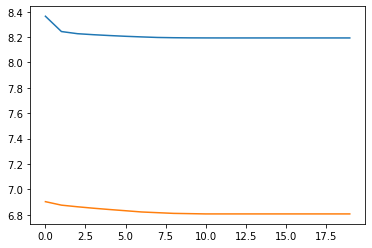

In [ ]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

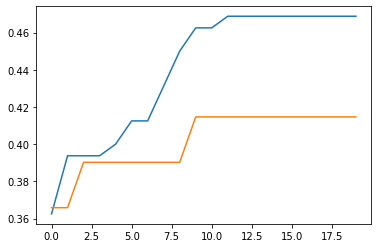

In [ ]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])

##**Classification and validation**

In [ ]:
yPred = model.predict(features_test)

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

cm = confusion_matrix(np.round(yPred), target_test, labels=[0.0,1.0])

In [ ]:
print(cm)

[[27 24]
 [ 0  0]]
